<a href="https://colab.research.google.com/github/ashleyliang08/IBM-Data-Analyst-PC-Tech-In-Demand-Analysis/blob/main/lec9_mod2_Finding_Duplicates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset.


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [ ]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 114.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 156.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 144.1 MB/s eta 0:00:00


Import pandas module


In [ ]:
import pandas as pd


Import matplotlib


In [ ]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [ ]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [ ]:
## Write your code here
num_null = df.isnull().sum()
print(num_null)


ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


**pandas.DataFrame.duplicated
DataFrame.deplicated（subset = None， keep = 'first '）[来源]
返回表示重复行的布尔系列。**

In [ ]:
import pandas as pd
# Assuming your dataset is loaded into a DataFrame called df
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.head())


Number of duplicate rows: 0
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, OfficeStackSyncHaveWo

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [ ]:
## Write your code here
duplicate_count = df.duplicated(subset = ['MainBranch','Employment','RemoteWork'],keep = False)
duplicate_rows = df[duplicate_count]
print(f"Number of duplicate rows based on MainBranch, Employment, and RemoteWork: {duplicate_rows.shape[0]}")
# Group duplicates by the selected subset columns
grouped = duplicate_rows.groupby(['MainBranch', 'Employment', 'RemoteWork'])
# For each group, check columns where all values are identical
def consistent_columns(group):
    return group.nunique() == 1
consistency = grouped.apply(consistent_columns)
# Summarize how often each column is consistent across duplicate groups
consistency_summary = consistency.sum()
print("Number of duplicate groups where columns are identical:")
print(consistency_summary)







Number of duplicate rows based on MainBranch, Employment, and RemoteWork: 65270
Number of duplicate groups where columns are identical:
ResponseId               0
MainBranch             319
Age                     30
Employment             319
RemoteWork             319
                      ... 
JobSatPoints_11         56
SurveyLength            75
SurveyEase              58
ConvertedCompYearly     35
JobSat                  45
Length: 114, dtype: int64


/tmp/ipykernel_300/3983697021.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  consistency = grouped.apply(consistent_columns)


### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


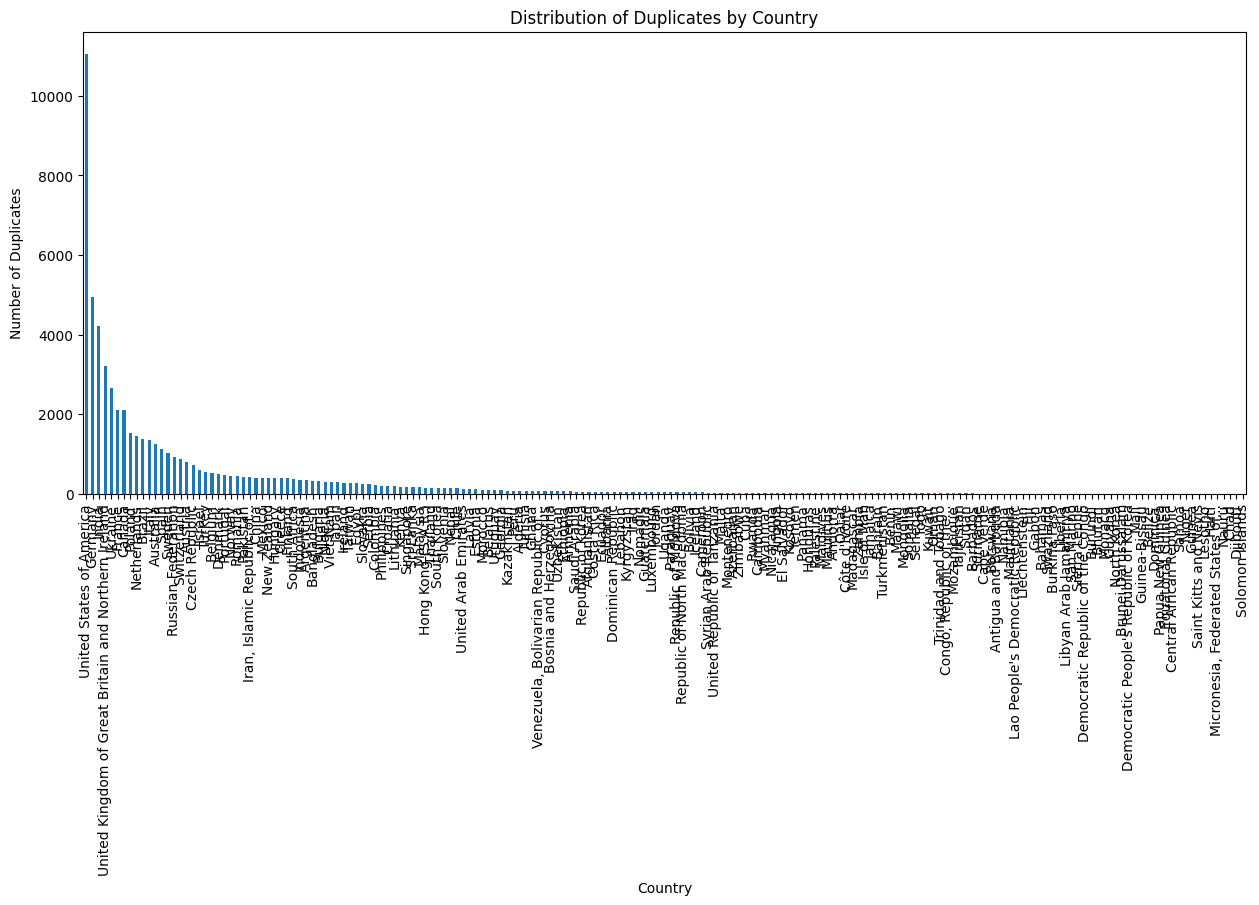

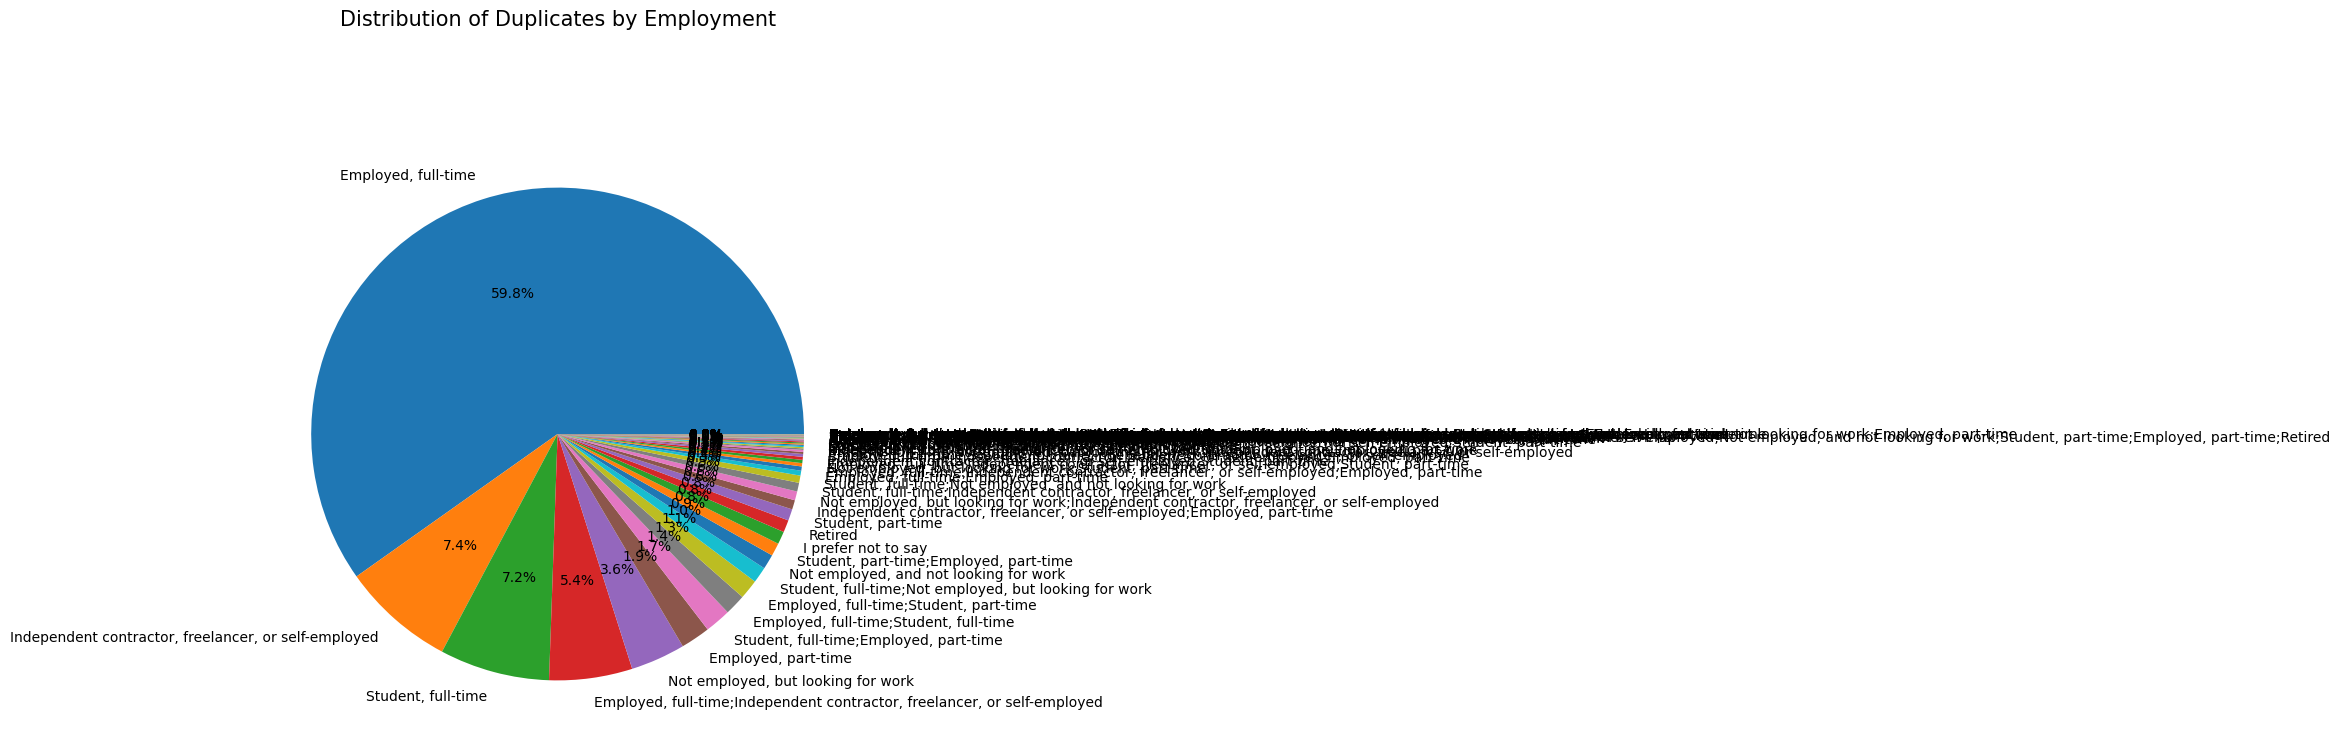

In [ ]:
## Write your code here
### Write your code here# Write your code here
# Step 2: Count duplicates by Country
country_counts = duplicate_rows['Country'].value_counts()
# Plot bar chart for duplicates by Country
plt.figure(figsize=(15,6))
country_counts.plot(kind='bar')
plt.title('Distribution of Duplicates by Country')
plt.xlabel('Country')
plt.ylabel('Number of Duplicates')
plt.show()

# Step 3: Count duplicates by Employment
employment_counts = duplicate_rows['Employment'].value_counts()
# Plot pie chart for duplicates by Employment
plt.figure(figsize=(15,8))
employment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Duplicates by Employment',fontsize = 15,y = 1.15)
plt.ylabel('')  # Hide y-label for pie chart
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [ ]:
## Write your code here
# Step 1: Define columns critical for uniqueness
unique_cols = ['Country', 'Employment', 'MainBranch']  # adjust based on your dataset

# Step 2: Remove duplicates based on these columns, keeping the first occurrence
df_unique = df.drop_duplicates(subset=unique_cols, keep='first')

# Step 3: Check how many duplicates were removed
num_duplicates_removed = len(df) - len(df_unique)
print(f"Number of duplicates removed: {num_duplicates_removed}")

# Optional: Assign back to df if you want to overwrite
df = df_unique
df[unique_cols].head()

Number of duplicates removed: 0


,Country,Employment,MainBranch
0,United States of America,"Employed, full-time",I am a developer by profession
1,United Kingdom of Great Britain and Northern I...,"Employed, full-time",I am a developer by profession
3,Canada,"Student, full-time",I am learning to code
4,Norway,"Student, full-time",I am a developer by profession
5,United States of America,"Student, full-time",I code primarily as a hobby


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


# Write your explanation here
## 重复数据识别与删除过程说明

在数据清洗阶段，首先使用 pandas 的 `duplicated()` 方法识别数据集中重复的行。重复的定义可以是整行完全相同，也可以基于部分关键列来判断。

通过对重复数据的统计和分析，我们了解了重复数据在不同类别（如国家和就业状态）中的分布情况。

随后，基于对数据的理解，选择了若干关键列（如 `Country`、`Employment` 和 `MainBranch`）作为唯一性判断的依据，使用 `drop_duplicates()` 方法删除重复项，只保留每组重复中的第一条记录。

这一策略性删除确保了数据的准确性，同时避免误删具有重要差异的信息。

2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


# Write your explanation here
## 选择特定列作为唯一性判断依据的理由

选择 `Country`、`Employment` 和 `MainBranch` 这几列作为判断重复的关键列，原因如下：

- **Country（国家）**：反映受访者的地理位置，是分析地域差异的重要因素。
- **Employment（就业状态）**：体现受访者的职业状态，对职业相关分析至关重要。
- **MainBranch（主要行业分支）**：表示受访者所在的技术领域，帮助区分不同技术背景的样本。

通过基于这些关键列删除重复数据，既能去除真正重复的记录，又能保留数据中有意义的差异，保证数据质量和分析的准确性。

### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
